In [1]:
import pandas as pd

In [2]:
vote62 = pd.read_parquet("source/vote62/vote62_10052023.parquet")
complete = pd.read_csv("ballot_complete_clean.csv.gz", compression="gzip")

In [ ]:
comp

In [4]:
vote62.head()

,division_number,id,is_verify,total_volunteers,unit_info,unit_number,Province,Amphur,Tambon
0,3,39261,False,1.0,โรงเรียนรุ่งอรุณศึกษา,1,กระบี่,คลองท่อม,ทรายขาว
1,3,39262,False,1.0,โรงเรียนบ้านห้วยลึก,2,กระบี่,คลองท่อม,ทรายขาว
0,3,39391,False,2.0,ศาลาอเนกประสงค์ประจำหมู่บ้าน หมู่ที่ 1 ตำบลพรุ...,1,กระบี่,คลองท่อม,พรุดินนา
3,3,39394,False,NaN,โรงพยาบาลส่งเสริมสุขภาพตำบลพรุดินนา หมู่ที่ 2 ...,4,กระบี่,คลองท่อม,พรุดินนา
7,3,39398,False,3.0,ศาลาอเนกประสงค์ประจำหมู่บ้าน หมู่ที่ 5 ตำบลพรุ...,8,กระบี่,คลองท่อม,พรุดินนา


In [5]:
complete.head()

,รหัสจังหวัด,จังหวัด,รหัสสำนักทะเบียน,สำนักทะเบียน,รหัสตำบล,ตำบล,เขตเลือกตั้ง,หน่วยเลือกตั้ง,สถานที่เลือกตั้ง,อธิบายเพิ่มเติมสถานที่เลือกตั้ง,NER
0,10,กรุงเทพมหานคร,1001,ท้องถิ่นเขตพระนคร,100101,พระบรมมหาราชวัง,1,1,หอประชุม มหาวิทยาลัยศิลปากร ถนนมหาราช,NaN,<FACILITY>หอประชุม มหาวิทยาลัยศิลปากร ถนนมหารา...
1,10,กรุงเทพมหานคร,1001,ท้องถิ่นเขตพระนคร,100101,พระบรมมหาราชวัง,1,2,โรงเรียนวัดมหาธาตุ ถนนพระจันทร์,NaN,<FACILITY>โรงเรียนวัดมหาธาตุ ถนนพระจันทร์</FAC...
2,10,กรุงเทพมหานคร,1001,ท้องถิ่นเขตพระนคร,100101,พระบรมมหาราชวัง,1,3,ศาลาหน้าอาคารวาสนะประทานวิทยาสิทธิ์ 1 โรงเรียน...,ถนนสนามไชย,ศาลาหน้า<FACILITY>อาคารวาสนะประทานวิทยาสิทธิ์ ...
3,10,กรุงเทพมหานคร,1001,ท้องถิ่นเขตพระนคร,100101,พระบรมมหาราชวัง,1,4,โรงเรียนวัดพระเชตุพน ถนนมหาราช,NaN,<FACILITY>โรงเรียนวัดพระเชตุพน ถนนมหาราช</FACI...
4,10,กรุงเทพมหานคร,1001,ท้องถิ่นเขตพระนคร,100102,วังบูรพาภิรมย์,1,1,ตึกสามัคยาจารย์ โรงเรียนสวนกุหลาบวิทยาลัย ถนนต...,NaN,<FACILITY>ตึกสามัคยา</FACILITY>จารย์ <FACILITY...


In [3]:
# translate column names to English
complete['Province_Lean'] = complete['จังหวัด'].str.removeprefix("จังหวัด")

In [4]:
complete.dtypes

รหัสจังหวัด                         int64
จังหวัด                            object
รหัสสำนักทะเบียน                    int64
สำนักทะเบียน                       object
รหัสตำบล                            int64
ตำบล                               object
เขตเลือกตั้ง                        int64
หน่วยเลือกตั้ง                      int64
สถานที่เลือกตั้ง                   object
อธิบายเพิ่มเติมสถานที่เลือกตั้ง    object
NER                                object
Province_Lean                      object
dtype: object

In [10]:
vote62.dtypes

division_number      object
id                    int64
is_verify              bool
total_volunteers    float64
unit_info            object
unit_number           int64
Province             object
Amphur               object
Tambon               object
dtype: object

In [5]:
vote62['division_number'] = vote62['division_number'].astype('int64')

In [6]:
# join the two dataframes
df = pd.merge(vote62, complete, how="inner", left_on=["Province", "division_number", "Tambon", "unit_number"], right_on=["Province_Lean", "เขตเลือกตั้ง", "ตำบล","หน่วยเลือกตั้ง"])

In [7]:
m = df.Tambon == df['ตำบล']

In [9]:
from editdistpy import levenshtein

In [10]:
# compute edit distance between สถานที่เลือกตั้ง and unit_info 
def compute_edit(row):
    return levenshtein.distance(row['สถานที่เลือกตั้ง'], row['unit_info'], max_distance=50)

df['edit_distance'] = df.apply(compute_edit, axis=1)

In [11]:
import numpy as np

In [12]:
df['relative_edit_distance'] = df['edit_distance'] / df['unit_info'].str.len()

<Axes: >

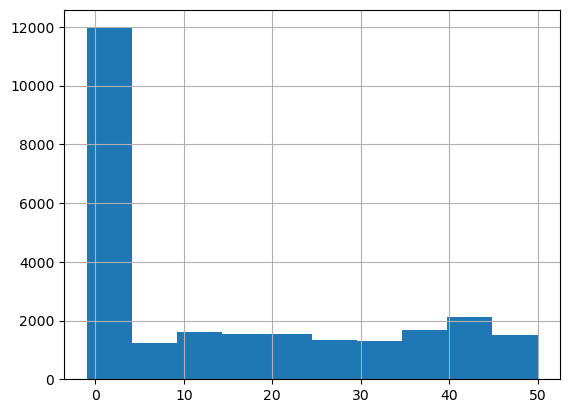

In [37]:
df.edit_distance.hist()

<Axes: >

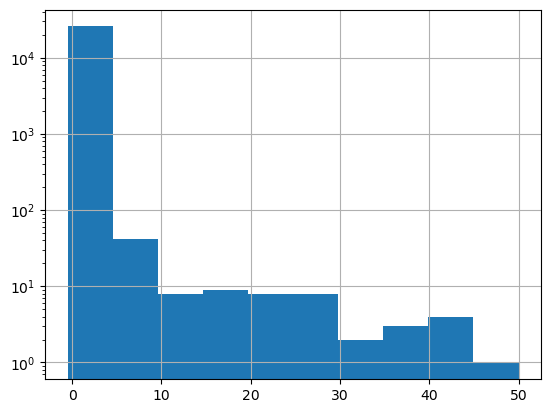

In [41]:
from numpy import log


df.relative_edit_distance.hist(log=True)

In [13]:
import pylcs

In [14]:
def compute_lcs(row):
    return pylcs.lcs(row['สถานที่เลือกตั้ง'], row['unit_info'])

df['lcs'] = df.apply(compute_lcs, axis=1)

In [16]:
df['relative_lcs'] = df['lcs'] / df['unit_info'].str.len()

<Axes: >

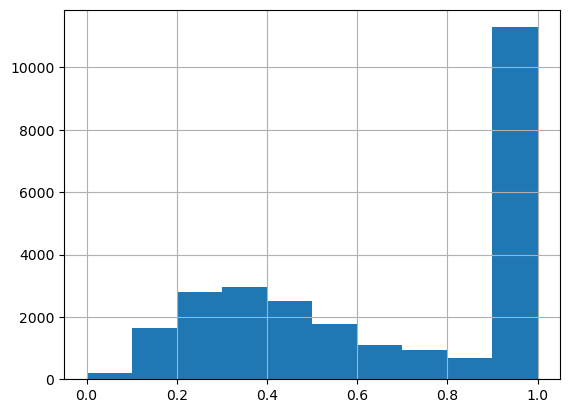

In [18]:
df.relative_lcs.hist()

In [19]:
df['relative_lcs'].describe()

count    25873.000000
mean         0.666377
std          0.320505
min          0.000000
25%          0.361111
50%          0.700000
75%          1.000000
max          1.000000
Name: relative_lcs, dtype: float64

In [24]:
# percentile table
df['relative_lcs'].describe(percentiles=list(map(lambda x: x/100,range(0, 100, 5))))

count    25873.000000
mean         0.666377
std          0.320505
min          0.000000
0%           0.000000
5%           0.170213
10%          0.227273
15%          0.275862
20%          0.318182
25%          0.361111
30%          0.402439
35%          0.446429
40%          0.505882
45%          0.583333
50%          0.700000
55%          0.840580
60%          0.956522
65%          0.975610
70%          1.000000
75%          1.000000
80%          1.000000
85%          1.000000
90%          1.000000
95%          1.000000
max          1.000000
Name: relative_lcs, dtype: float64

In [ ]:
df.to